# Libraries 

In [2]:
# ttest_ind: This function performs a two-sample t-test. It tests the null hypothesis that two independent samples have identical average (expected) values.
# Usage: ttest_ind(sample1, sample2)

# ttest_1samp: This function performs a one-sample t-test. It tests the null hypothesis that the mean of a single sample is equal to a known value.
# Usage: ttest_1samp(sample, popmean)

# pearsonr: This function calculates the Pearson correlation coefficient and the p-value for testing non-correlation. The Pearson correlation coefficient measures the linear relationship between two datasets.
# Usage: pearsonr(x, y)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats import ttest_ind, ttest_1samp,pearsonr

Health expectancy

In [4]:
df =sns.load_dataset('healthexp')

In [5]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [6]:
df_filtred =df.query('`Year`>=2000 and `Year`<=2020 & `Country`=="USA"')

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

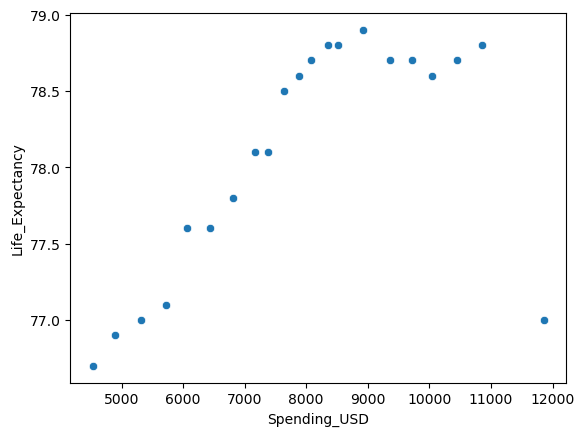

In [7]:
sns.scatterplot(data = df_filtred, x=df_filtred['Spending_USD'], y=df_filtred['Life_Expectancy'])

In [8]:
pearsonr(df_filtred['Spending_USD'],df_filtred['Life_Expectancy'])

PearsonRResult(statistic=0.6210674528998252, pvalue=0.002658154480579908)

* La probabilité d'obtenir une telle correlation sl les deux variables étaient en realite totalemenement decorrélées seraient de 0.0026 autreemnet dit lle seraient de 1chances sur 376

# Dans la video précedentes il semble également que l'allemagne et la grande -Bretagne avaient la meme dureer de vie moyenne

In [9]:
pearsonr(df['Spending_USD'],df['Life_Expectancy'])

PearsonRResult(statistic=0.5794304588530952, pvalue=5.704081208901827e-26)

In [11]:
df_temp = df.query('`Country`=="Germany" | `Country`=="Great Britain"')

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

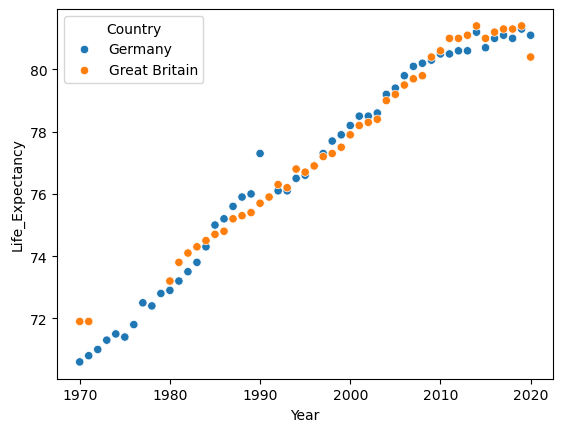

In [12]:
sns.scatterplot(data=df_temp,x="Year",y="Life_Expectancy",hue="Country")

Condition d'utiliser un test de Student:
1. Distribution normale des données
2. Les obsevation sont indépendantes les unes des autres
3. Les deux groupes ont environ la meme variance

On ne peux pas faire le test de student car ce dernier implique une indépendance entre les différentes observations 

3. Un politicien american affirme que depuis 1970 la durée de vie aux états unis a augmenté de moyenne 0.3 ans. Pour vérifier cette affirmation, vous avez accès à un jeu de données contenant l'espérance de vie aux états unis depuis 1970. Proposez un test statistique pour vérifier cette affirmation. niveau de cofiance =98ù alpha 0.02

3. Un politicien american affirme que depuis 1970 la durée de vie aux états unis a augmenté de moyenne 0.3 ans. Pour vérifier cette affirmation, vous avez accès à un jeu de données contenant l'espérance de vie aux états unis depuis 1970. Proposez un test statistique pour vérifier cette affirmation. (2 points)

In [19]:
df.query('`Country`=="USA" ')["Life_Expectancy"].diff().dropna().mean()

0.12199999999999989

Condition pour utiliser un ttest 1 sample :
* Données indépendantes les unes des autres
* Isues d'une distribution normale( ou plus de 30 observations)

In [26]:
df_usa = df.query('`Country`=="USA"').copy()
df_usa.loc[:, "life_diff"] = df_usa["Life_Expectancy"].diff()

<Axes: xlabel='Year', ylabel='life_diff'>

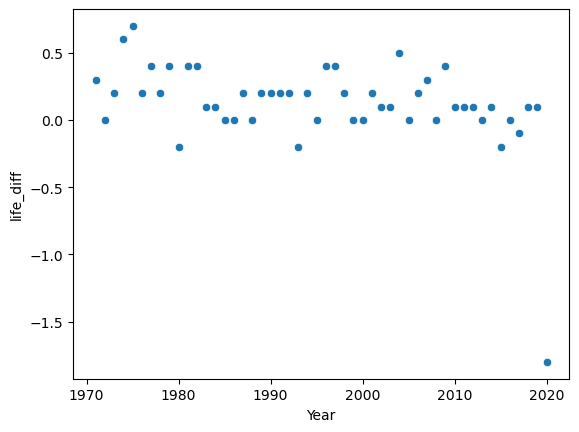

In [27]:
sns.scatterplot(data=df_usa, x="Year", y="life_diff")


In [30]:
ttest_1samp(df_usa["life_diff"].dropna(), popmean=0.3)

TtestResult(statistic=-3.7212105613188773, pvalue=0.0005112013249193949, df=49)

La p_value de notre test est inferieure a 0.02 on peut rejeter l'hypothese de politicien american